# Clasificarea emotiilor - Bag of Words - Logistic Regressor

In [1]:
import csv
import os
from utils import *

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

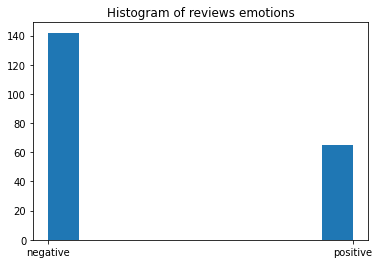

In [2]:
# load some data
crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'data', 'reviews_mixed.csv')

data = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            dataNames = row
        else:
            data.append(row)
        line_count += 1

inputs = [data[i][0] for i in range(len(data))]
outputs = [data[i][1] for i in range(len(data))]
labelNames = list(set(outputs))

plot_data_histograms(outputs, 'reviews emotions')

### Pasul 2 - Extragerea caracteristicilor

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

inputs = vectorizer.fit_transform(inputs).toarray().tolist()

### Pasul 3 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [4]:

import numpy as np

noSamples = len(inputs)
indexes = [i for i in range(noSamples)]
trainSample = np.random.choice(indexes, int(0.8 * noSamples), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

### Pasul 4 - Invatare model

In [5]:
from sklearn.linear_model import LogisticRegression
print(trainOutputs)
classifier = LogisticRegression()
classifier = classifier.fit(trainInputs, trainOutputs)

['negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'ne

### Pasul 5 - Testarea datelor de validare

In [6]:
computedTestOutputs = classifier.predict(testInputs)

### Pasul 6 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy - by tool: 0.6428571428571429


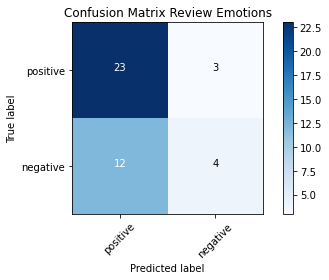

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(testOutputs, computedTestOutputs)
print('Accuracy - by tool:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(testOutputs, computedTestOutputs)
plot_confusion_matrix(cm, labelNames, 'Review Emotions')